In [80]:
tiempo=sc.wholeTextFiles("Meteo/")#RDD formado por tuplas(nombre,contenido)
tiempo.collect()

[('file:/home/bigdata/Proyectos/Meteo/vigo.json',
  '{"listEstadoActual":[{"concello":"VIGO","dataLocal":"2018-03-08T09:20:00","dataUTC":"2018-03-08T08:20:00","estacion":"Vigo","idEstacion":10142,"lat":42.2259,"lnIconoCeo":-9999,"lnIconoTemperatura":402,"lnIconoVento":-9999,"lon":-8.7135,"provincia":"Pontevedra","utmx":"523643.0","utmy":"4674903.0","valorSensTermica":11.6,"valorTemperatura":11.6}]}'),
 ('file:/home/bigdata/Proyectos/Meteo/santiago.json',
  '{"listEstadoActual":[{"concello":"SANTIAGO DE COMPOSTELA","dataLocal":"2018-03-08T09:20:00","dataUTC":"2018-03-08T08:20:00","estacion":"Santiago-EOAS","idEstacion":10124,"lat":42.876,"lnIconoCeo":111,"lnIconoTemperatura":401,"lnIconoVento":306,"lon":-8.55943,"provincia":"A Coruña","utmx":"535982.0","utmy":"4747135.0","valorSensTermica":7.9,"valorTemperatura":8.4}]}'),
 ('file:/home/bigdata/Proyectos/Meteo/boiro.json',
  '{"listEstadoActual":[{"concello":"BOIRO","dataLocal":"2018-03-08T12:00:00","dataUTC":"2018-03-08T11:00:00","estac

In [81]:
import json #usaremos el método json.loads()

resultado=tiempo.map(lambda x:json.loads(x[1]))\
                .map(lambda y:y['listEstadoActual'][0])\
                .map(lambda z:(z["concello"],z["valorTemperatura"]))

#comprobación del tipo de datos
resultado.map(lambda x:type(x)).first(),resultado.collect()

(tuple,
 [('VIGO', 11.6),
  ('SANTIAGO DE COMPOSTELA', 8.4),
  ('BOIRO', 10.7),
  ('ARTEIXO', 13.6),
  ('CARNOTA', 10.8)])

In [82]:
def miFuncion(x):    
    y=json.loads(x[1])['listEstadoActual'][0]    
    return (y["concello"],y["valorTemperatura"])

resultado2=tiempo.map(miFuncion)
resultado2.collect()

[('VIGO', 11.6),
 ('SANTIAGO DE COMPOSTELA', 8.4),
 ('BOIRO', 10.7),
 ('ARTEIXO', 13.6),
 ('CARNOTA', 10.8)]

In [83]:
import matplotlib.pyplot as grafica

In [86]:
etiquetas=resultado2.keys().collect()
etiquetas

['VIGO', 'SANTIAGO DE COMPOSTELA', 'BOIRO', 'ARTEIXO', 'CARNOTA']

In [88]:
valores=resultado2.values().collect()
x=range(5)
valores

[11.6, 8.4, 10.7, 13.6, 10.8]

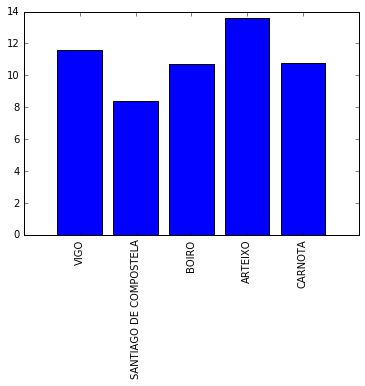

In [94]:
grafica.bar(x,valores,align="center")
grafica.xticks(x,etiquetas,rotation='vertical')

grafica.show()